# Wine Reviewer: winemag-data-130k-v2数据集分析与预处理

## 1.导入文件和使用的函数库，并查看前五行

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv("/Users/liuhao/Desktop/刘豪_3120191022/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


### 可以看出数据集有129971行，13列，其中数值属性2列，标称属性11列。

# 2.数据可视化和摘要

### 2.1 标称属性数据摘要：
上述表格给出的属性，共有11个标称属性，统计其频数

In [3]:
data['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [4]:
data['description'].value_counts()

Stalky aromas suggest hay and green herbs, with raspberry in the backdrop. It's hot and short in terms of mouthfeel, with herbal flavors leading the way and berry fruit running behind. Dry red fruit and herbal notes dominate the finish.                                                                               3
This zesty red has pretty aromas that suggest small red berry, blue flower and a whiff of moist soil. The vibrant palate offers sour cherry, pomegranate and a hint of anise alongside zesty acidity and refined tannins.                                                                                                  3
Ripe plum, game, truffle, leather and menthol are some of the aromas you'll find on this earthy wine. The tightly wound palate offers dried black cherry, chopped sage, mint and roasted coffee bean alongside raspy tannins that leave a mouth-drying finish.                                                             3
Seductively tart in lemon pith, cranberry and pom

In [5]:
data['designation'].value_counts()

Reserve                     2009
Estate                      1322
Reserva                     1259
Riserva                      698
Estate Grown                 621
                            ... 
Coccineous Estate              1
Capellanía Reserva             1
Terroir Andrews Vineyard       1
Adrian's Reserve               1
Donna Madda                    1
Name: designation, Length: 37979, dtype: int64

In [6]:
data['province'].value_counts()

California      36247
Washington       8639
Bordeaux         5941
Tuscany          5897
Oregon           5373
                ...  
Cape Agulhas        1
Corinthia           1
Beotia              1
Ticino              1
Dolenjska           1
Name: province, Length: 425, dtype: int64

In [7]:
data['region_1'].value_counts()

Napa Valley                4480
Columbia Valley (WA)       4124
Russian River Valley       3091
California                 2629
Paso Robles                2350
                           ... 
McLaren Vale-Padthaway        1
Clare Valley-Coonawarra       1
Saussignac                    1
Saint Guilhem le Désert       1
Breganze                      1
Name: region_1, Length: 1229, dtype: int64

In [8]:
data['region_2'].value_counts()

Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Southern Oregon        917
Oregon Other           727
Long Island            680
North Coast            584
Washington Other       534
South Coast            272
New York Other         231
Name: region_2, dtype: int64

In [9]:
data['taster_name'].value_counts()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [10]:
data['taster_twitter_handle'].value_counts()

@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1005
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

In [11]:
data['title'].value_counts()

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                     11
Korbel NV Brut Sparkling (California)                                       9
Segura Viudas NV Extra Dry Sparkling (Cava)                                 8
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)                     7
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)                        7
                                                                           ..
Baywood 2006 Vineyard Select Symphony (California)                          1
Laurens 1996 Clos des Demoiselles Brut Chenin Blanc (Crémant de Limoux)     1
Goose Ridge 2006 Merlot (Columbia Valley (WA))                              1
Tommasi 2012 Poggio al Tufo Cabernet Sauvignon (Toscana)                    1
Firriato 2009 Harmonium Nero d'Avola (Sicilia)                              1
Name: title, Length: 118840, dtype: int64

In [12]:
data['variety'].value_counts()

Pinot Noir                   13272
Chardonnay                   11753
Cabernet Sauvignon            9472
Red Blend                     8946
Bordeaux-style Red Blend      6915
                             ...  
Pinot Gris-Gewürztraminer        1
Tinta Amarela                    1
Verdosilla                       1
Forcallà                         1
Gamza                            1
Name: variety, Length: 707, dtype: int64

In [13]:
data['winery'].value_counts()

Wines & Winemakers                   222
Testarossa                           218
DFJ Vinhos                           215
Williams Selyem                      211
Louis Latour                         199
                                    ... 
Eszterbauer                            1
Ad Lib                                 1
Writer's Block                         1
Château La Lagune                      1
Château Beaulieu Comtes de Tastes      1
Name: winery, Length: 16757, dtype: int64

### 2.2 数值属性数据摘要：
上述表格给出的属性，共有2个数值属性，计算5数概括及缺失值的个数

In [14]:
def Five_Number_Summary_Null(x):
    return pd.Series([x.name,x.min(),x.quantile(.25),x.median(),x.quantile(.75),x.max(),x.isnull().sum()], 
                     index = ['数值属性:','Minimum:','Q1:','Median:','Q3:','Maximum:','缺失值个数:'])

Five_Number_Summary_Null(data['points'])

数值属性:       points
Minimum:        80
Q1:             86
Median:         88
Q3:             91
Maximum:       100
缺失值个数:           0
dtype: object

In [15]:
Five_Number_Summary_Null(data['price'])

数值属性:       price
Minimum:        4
Q1:            17
Median:        25
Q3:            42
Maximum:     3300
缺失值个数:       8996
dtype: object

### 2.3 数据可视化 

数值属性: points
缺失值个数: 0


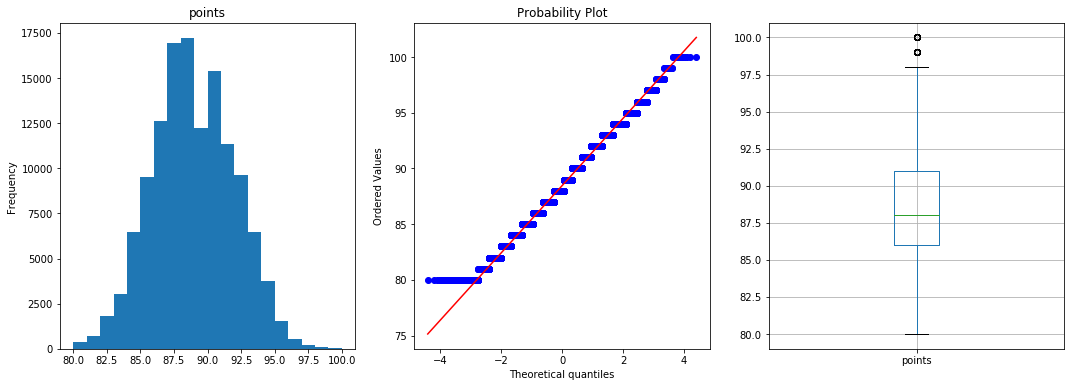

In [16]:
def visualize(x):
    print("数值属性:",x.name)
    print('缺失值个数:',x.isnull().sum())
    plt.figure(figsize=(18, 6))
    plt.subplot(131)
    x.plot.hist(grid=False,bins=20,title=x.name)
    plt.subplot(132)
    stats.probplot(x, dist="norm", plot=plt)#检测数据分布
    plt.subplot(133)
    pd.DataFrame({x.name:x}).boxplot()
    plt.show()
    
visualize(data['points'])

### 数值属性"points"：由直方图可以看出，数据近似呈现正态分布，由qq图看出数据点都近似分布在一条直线附近，进一步验证了数值属性points符合正态分布。由盒图可以看出有两个离群点。

数值属性: price
缺失值个数: 8996


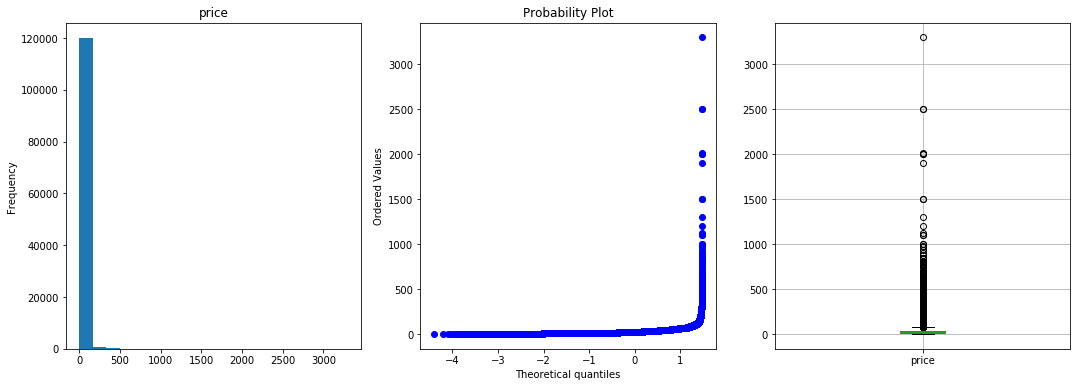

In [17]:
visualize(data['price'])

### 数值属性"price"：由直方图可以看出，数据绝大多数小于500，由qq图看出数据点不呈直线，说明了数值属性price不符合正态分布。由盒图可以看出有非常多的离群点。

# 3.数据缺失处理

### "price"属性有8996个缺失值，缺失原因可能是有些价格不是很好收集，或者有些稀有酒价格不好定义

### 3.1 将缺失部分剔除，并重新可视化数据

数值属性: price
缺失值个数: 0


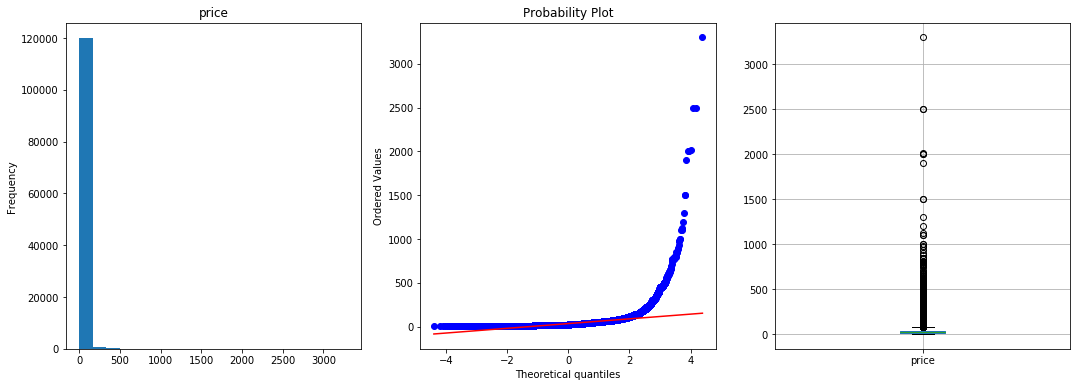

In [18]:
visualize(data['price'].dropna())

### 结论：处理后缺失值的个数为0，但可视化后可以发现，其分布并没有和以前有很大差距，可能因为缺失数据太少，剔除缺失值并不能显著改变原来的数据分布特性。

### 3.2 用最高频率值来填补缺失值，并重新可视化数据

数值属性: price
缺失值个数: 0


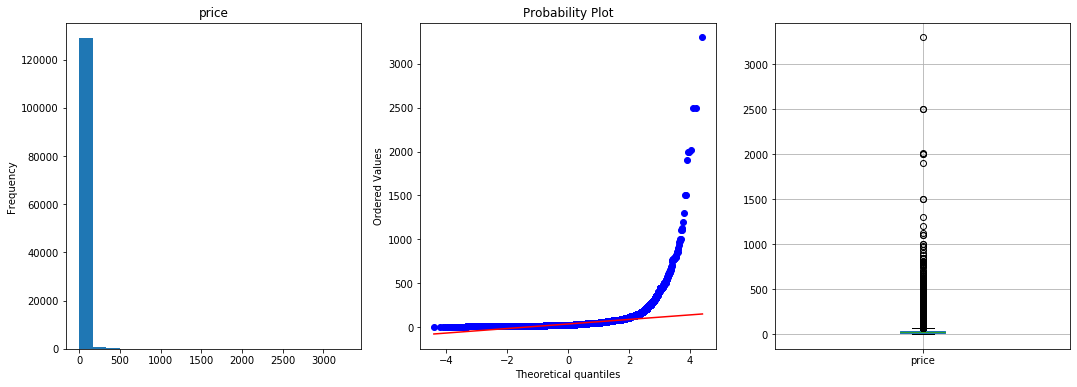

In [19]:
visualize(data['price'].fillna(data['price'].mode()[0]))

### 结论：处理后缺失值的个数为0，可视化后其分布并没有和以前有很大差距，可能因为缺失数据太少，而频率最高值的加入并不能显著改变原来的数据分布特性。

### 3.3 通过属性的相关关系来填补缺失值，并重新可视化数据

### 用'points'数值属性来预测缺失值，随机森林拟合结果如下

数值属性: price
缺失值个数: 0


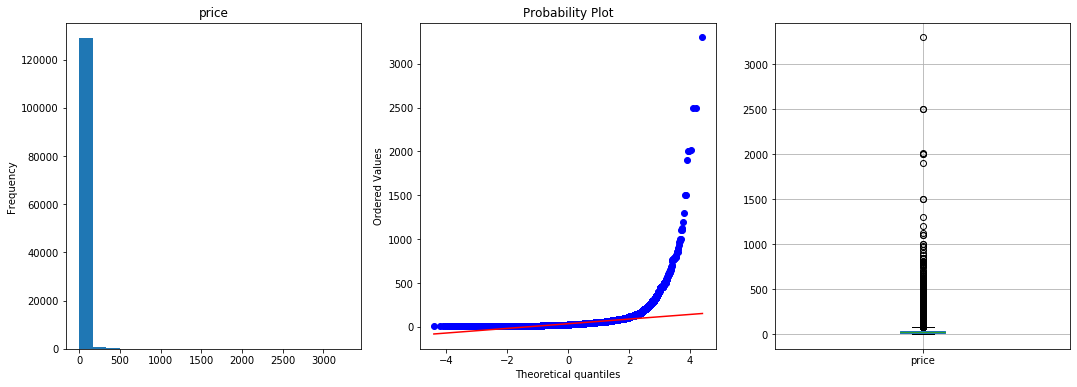

In [20]:
train=data[data['price'].notnull()]
X, Y=train[['points']], train[['price']]
test=data[data['price'].isnull()]
points=test[['points']]
price=test['price']
model=RandomForestRegressor(n_estimators=100,oob_score=True,random_state=1)
model.fit(X,Y.values.ravel())
predicted_Price=model.predict(points)
data_pred = data.copy()#copy一份，防止影响原数据
data_pred.loc[(data['price'].isnull()),'price']=predicted_Price
visualize(data_pred['price'])

### 结论：处理后缺失值的个数为0，可视化后其分布并没有和以前有很大差距，可能因为缺失数据太少，并且仅由‘points’一列来进行相关关系分析，效果不好也在情理之中。

### 3.4 通过数据对象之间的相似性来填补缺失值，并重新可视化数据

###  用knn算法来寻找相似性

数值属性: price
缺失值个数: 0


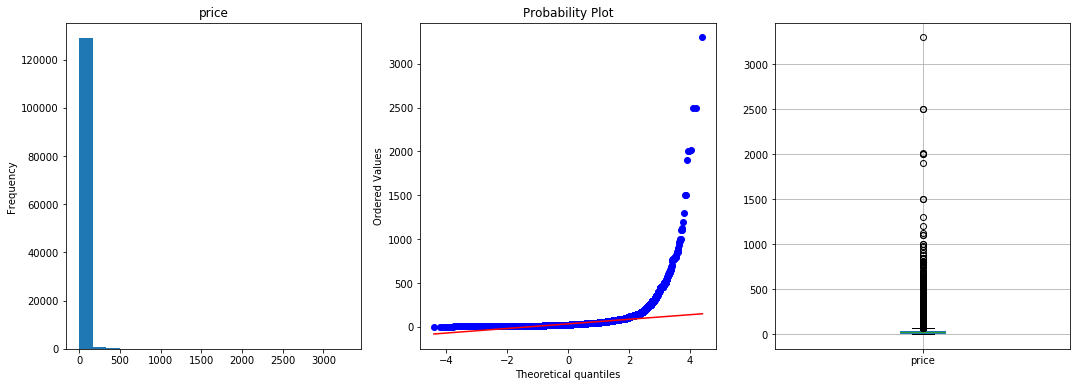

In [21]:
train=data[data['price'].notnull()]
X, Y=train[['points']], train[['price']]
test=data[data['price'].isnull()]
points=test[['points']]
price=test['price']
clf=KNeighborsClassifier(n_neighbors=3,weights='distance')#3临域
clf.fit(X,Y.values.ravel())
predicted_Price=clf.predict(points)
data_pred_knn = data.copy()
data_pred_knn.loc[(data['price'].isnull()),'price']=predicted_Price
visualize(data_pred_knn['price'])

### 结论：处理后缺失值的个数为0，可视化后其分布并没有和以前有很大差距，可能因为缺失数据太少，并且仅由‘points’一列来进行相似性，分析效果不好也在情理之中。